In [81]:
import datetime, time
import matplotlib.pyplot as plt
import pandas as pd
import networkx as nx

template = pd.read_csv("data/CGCS-Template.csv") 
template.head(2)

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude
0,0,4,-99,-99,-99,NaN,NaN,NaN,NaN,NaN,NaN
1,41,0,34,86400,1,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
demographic_categories = {
  459381:"Water and other public services",
  466907:"Electricity",
  473173:"Household furnishings",
  503218:"Natural gas",
  503701:"Miscellaneous",
  510031:"Gifts",
  520660:"Healthcare",
  523927:"Restaurants",
  527449:"Alcohol",
  536346:"Home maintenance",
  537281:"Housekeeping supplies",
  552988:"Money income before taxes",
  567195:"Personal insurance and pensions",
  571970:"Reading",
  575030:"Transportation",
  577992:"Education",
  580426:"Telephone services",
  589943:"Lodging away from home",
  595298:"Groceries",
  595581:"Donations",
  606730:"Entertainment",
  616315:"Apparel and services",
  620120:"Personal taxes",
  621924:"Mortgage payments",
  630626:"Rented dwellings",
  632961:"Personal care products and services",
  640784:"Tobacco",
  642329:"Household operations",
  644226:"Property taxes",
}

In [83]:
jan_1_2025 = datetime.datetime(2025, 1, 1, 0, 0)

def to_datetime(seconds: int) -> datetime.datetime:
    return jan_1_2025 + datetime.timedelta(seconds=seconds)

In [84]:
template['Epoch']          = template.Time.apply(lambda t: int(to_datetime(t).timestamp()))
template['formatted_Time'] = template.Time.apply(lambda t: to_datetime(t).strftime("%Y-%m-%d,%H:%M:%S"))
template['day']            = template.Time.apply(lambda t: to_datetime(t).strftime("%Y-%m-%d"))
template['source_target']  = template.Source.astype(str) + '-' + template.Target.astype(str)
template['demo_category']  = template.Target.apply(lambda t: demographic_categories.get(t, "NA"))

In [85]:
template.head(2)

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude,Epoch,formatted_Time,day,source_target,demo_category
0,0,4,-99,-99,-99,NaN,NaN,NaN,NaN,NaN,NaN,1735700301,"2024-12-31,23:58:21",2024-12-31,0--99,NA
1,41,0,34,86400,1,NaN,NaN,NaN,NaN,NaN,NaN,1735786800,"2025-01-02,00:00:00",2025-01-02,41-34,NA


In [6]:
eTypes = {
    0: 'phone',
    1: 'mail',
    2: 'procurement',
    3: 'procurement',
    4: 'co-authorship',
    5: 'demographics',
    6: 'travel',
}

In [ ]:
by_eType = template.eType.value_counts().to_dict()

plt.xticks(list(eTypes.keys()), list(eTypes.values()), rotation=45)
plt.bar(by_eType.keys(), by_eType.values())
plt.savefig('template_eType_counts.png')

In [10]:
travel_channel = template.loc[template.eType.isin([6])]

In [149]:
#travel_per_day = travel_channel['day']
#plt.xticks(rotation=90)
#plt.hist(travel_per_day, alpha=0.5, histtype='bar', ec='black')

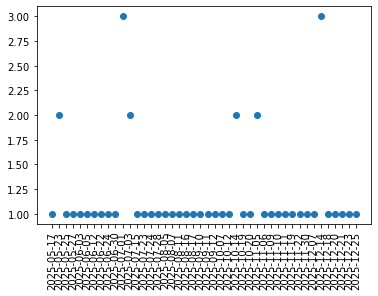

In [9]:
from collections import Counter
travel_per_day_count = Counter(travel_channel.day.to_list())
plt.xticks(rotation=90)
plt.scatter(list(travel_per_day_count.keys()), list(travel_per_day_count.values()))

In [10]:
sorted(travel_channel.Source.unique()), sorted(travel_channel.Target.unique())

([39, 40, 41, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87],
 [69, 70, 71, 72, 76, 81])

In [16]:
demo_channel = template.loc[template.eType.isin([5])]

In [7]:
# edge 0: phone
# edge 1: email

communication_channel = template.loc[template.eType.isin([0])] #0,1
communication_channel.head(2)

,Source,eType,Target,Time,Weight,SourceLocation,TargetLocation,SourceLatitude,SourceLongitude,TargetLatitude,TargetLongitude,Epoch,formatted_Time,day,source_target,demo_category
1,41,0,34,86400,1,NaN,NaN,NaN,NaN,NaN,NaN,1735786800,"2025-01-02,00:00:00",2025-01-02,41-34,NA
2,37,0,27,94461,1,NaN,NaN,NaN,NaN,NaN,NaN,1735794861,"2025-01-02,02:14:21",2025-01-02,37-27,NA


In [ ]:
comm_transactions = len(communication_channel)
comm_transactions

In [ ]:
comm_sources = communication_channel.Source
comm_targets = communication_channel.Target

comm_unique_sources = communication_channel.Source.unique()
comm_unique_targets = communication_channel.Target.unique()

len(comm_sources), len(comm_unique_sources), len(comm_targets), len(comm_unique_targets)

In [ ]:
comm_nodes = set(comm_unique_sources).union(set(comm_unique_targets))
comm_nodes

In [ ]:
epoch_sorted = communication_channel.sort_values(by=['Epoch'], ascending=True)
epoch_sorted.head(2)

In [ ]:
comm_graph = nx.DiGraph(directed=True)

graph_number = 0
for index, row in epoch_sorted.iterrows():
    if comm_graph.has_edge(row.Source, row.Target):
        comm_graph[row.Source][row.Target]['weight'] += 1
    else:
        comm_graph.add_edge(row.Source, row.Target, weight = 1)
    
    plt.figure(graph_number, figsize = (8, 8))
    plt.title(row.formatted_Time)
     
    nx.draw(comm_graph,
           pos = nx.circular_layout(comm_graph), 
           with_labels = True, 
           font_weight = 'bold', 
           font_size = 11, font_family = 'sans-serif', 
           width = 3, 
           alpha = 0.5, 
           edge_color = 'b')

    plt.savefig("phone/template.grafo." + str(graph_number).zfill(3) + ".png")
    graph_number += 1

In [ ]:
# colorear edges según frecuencia

esmall = [(u, v) for (u, v, d) in comm_graph.edges(data=True) if (d['weight'] > 1 and d['weight'] < 3)]
emedium = [(u, v) for (u, v, d) in comm_graph.edges(data=True) if (d['weight'] >= 3 and d['weight'] < 12)]
elarge   = [(u, v) for (u, v, d) in comm_graph.edges(data=True) if d['weight'] >= 12]

plt.figure(0, figsize=(8, 8))
pos = nx.circular_layout(comm_graph)
nx.draw_networkx_nodes(comm_graph, pos)
nx.draw_networkx_edges(comm_graph, pos, edgelist=esmall, width=2, alpha=0.3, edge_color='g')
nx.draw_networkx_labels(comm_graph, pos, font_size=12, font_family='sans-serif')
plt.savefig("phone.grafo.small.png")
nx.draw_networkx_edges(comm_graph, pos, edgelist=emedium, width=2, alpha=0.3, edge_color='b')
plt.savefig("phone.grafo.medium.png")
nx.draw_networkx_edges(comm_graph, pos, edgelist=elarge, width=2, alpha=0.3, edge_color='r')
plt.savefig("phone.grafo.large.png")

In [ ]:
plt.clf()
for x in range(563): plt.close(x)

In [ ]:
max_degree = max(sorted([d for n, d in comm_graph.degree()], reverse=True))
phone_transaction_weights = [data['weight'] for (source, target, data) in comm_graph.edges(data = True)]

plt.xticks(list(range(max_degree)))
plt.hist(phone_transaction_weights)
plt.savefig("phone/transaction_weights.png")

In [ ]:
edges_by_weight = [(source,target,data['weight']) for (source,target,data) in comm_graph.edges(data=True)]
edges_by_weight.sort(key = lambda x: x[2], reverse = True)

# las 5 llamadas más frecuentes
edges_by_weight[0:5]

In [ ]:
edges, weights = zip(*nx.get_edge_attributes(comm_graph, 'weight').items())

nx.draw(comm_graph, 
        pos = nx.circular_layout(comm_graph),
        edgelist = edges, 
        edge_color = weights, 
        width = 4,
        edge_cmap = plt.cm.Reds)
nx.draw_networkx_labels(comm_graph, pos, font_size=12, font_family='sans-serif')

plt.savefig('phone/edges.png')

In [ ]:
# nodo con más llamadas salientes
source_with_most_edges = max(comm_graph.degree(), key = lambda x: x[0])
node_most_outgoing = comm_graph[source_with_most_edges[0]]
print(source_with_most_edges)
print(node_most_outgoing)
print(node_most_outgoing.values())

# nodo con más llamadas entrantes
target_with_most_edges = max(comm_graph.degree(), key = lambda x: x[1])
node_most_incoming = comm_graph[target_with_most_edges[0]]
print(target_with_most_edges)
print(node_most_incoming)
print(node_most_incoming.values())

In [ ]:
plt.clf()
from networkx.algorithms import bipartite

node_type, node_number = eTypes[6], 6

channel = template.loc[template.eType.isin([node_number])]
epoch_sorted = channel.sort_values(by=['Epoch'], ascending=True)

sources = set(channel.Source.to_list())
targets = set(channel.Target.to_list())

G = nx.DiGraph(directed=True)
G.add_nodes_from(sources, bipartite=0)
G.add_nodes_from(targets, bipartite=1)

i = 0
for index, row in epoch_sorted.iterrows():
    if G.has_edge(row.Source, row.Target): G[row.Source][row.Target]['weight'] += 1
    else: G.add_edge(row.Source, row.Target, weight = 1)
    plt.figure(i, figsize = (8, 8))
    plt.title(row.formatted_Time)
    nx.draw(G,
           pos = nx.bipartite_layout(G, nodes = sources),
           with_labels = True, 
           font_weight = 'bold', 
           font_size = 11, font_family = 'sans-serif', 
           width = 3, 
           alpha = 0.5, 
           edge_color = 'b')
    plt.savefig(node_type + "/template.grafo." + str(i).zfill(3) + ".png")
    i += 1

In [ ]:
plt.clf()

import collections

graphs = ["data/CGCS-Template.csv","data/Q1-Graph1.csv","data/Q1-Graph2.csv","data/Q1-Graph3.csv","data/Q1-Graph4.csv","data/Q1-Graph5.csv"]

node_type, node_number = eTypes[6], 6

for graph in graphs:
    df = pd.read_csv(graph)
    df['Epoch']          = df.Time.apply(lambda t: int(to_datetime(t).timestamp()))
    df['formatted_Time'] = df.Time.apply(lambda t: to_datetime(t).strftime("%Y-%m-%d,%H:%M:%S"))
    channel              = df.loc[df.eType.isin([node_number])]
    epoch_sorted         = channel.sort_values(by=['Epoch'], ascending=True)

    G = nx.DiGraph(directed=True)
    for index, row in epoch_sorted.iterrows():
        G.add_edge(row.Source, row.Target, weight = row.Weight)

    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')
    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)
    #plt.show()

In [9]:
# procurement_channel
pc = template.loc[template.eType.isin([2, 3])]

procurement_operations = []
for index, row in pc.iterrows():
    if row['eType'] == 2:
        seller = row.Source
        item   = row.Target
        time   = row.formatted_Time
        weight = row.Weight
        buyer  = pc[(pc.formatted_Time==time)&(pc.Target==item)&(pc.eType==3)]['Source'].to_list()[0]
        procurement_operations.append((seller, item, buyer, weight, time))

import datetime
to_datetime = lambda s: datetime.datetime.strptime(s, '%Y-%m-%d,%H:%M:%S')
operation_dates = [to_datetime(x[4]) for x in procurement_operations]
diffs = [int((d2-d1).total_seconds()/60.0/60.0/24.0) for (d1,d2) in zip(operation_dates[:-1], operation_dates[1:])]

procurement_operations, operation_dates, diffs

([(67, 657187, 39, 300, '2025-04-21,04:15:49'),
  (67, 657187, 39, 100, '2025-05-15,12:48:58'),
  (67, 657187, 39, 100, '2025-05-17,06:52:48'),
  (67, 657187, 39, 300, '2025-06-07,17:52:49'),
  (67, 657187, 39, 600, '2025-06-17,13:03:38'),
  (67, 657187, 39, 300, '2025-06-26,12:29:53'),
  (67, 657187, 39, 600, '2025-06-26,20:00:49'),
  (67, 657187, 39, 800, '2025-07-20,04:22:01'),
  (67, 657187, 39, 300, '2025-08-16,10:07:44')],
 [datetime.datetime(2025, 4, 21, 4, 15, 49),
  datetime.datetime(2025, 5, 15, 12, 48, 58),
  datetime.datetime(2025, 5, 17, 6, 52, 48),
  datetime.datetime(2025, 6, 7, 17, 52, 49),
  datetime.datetime(2025, 6, 17, 13, 3, 38),
  datetime.datetime(2025, 6, 26, 12, 29, 53),
  datetime.datetime(2025, 6, 26, 20, 0, 49),
  datetime.datetime(2025, 7, 20, 4, 22, 1),
  datetime.datetime(2025, 8, 16, 10, 7, 44)],
 [24, 1, 21, 9, 8, 0, 23, 27])

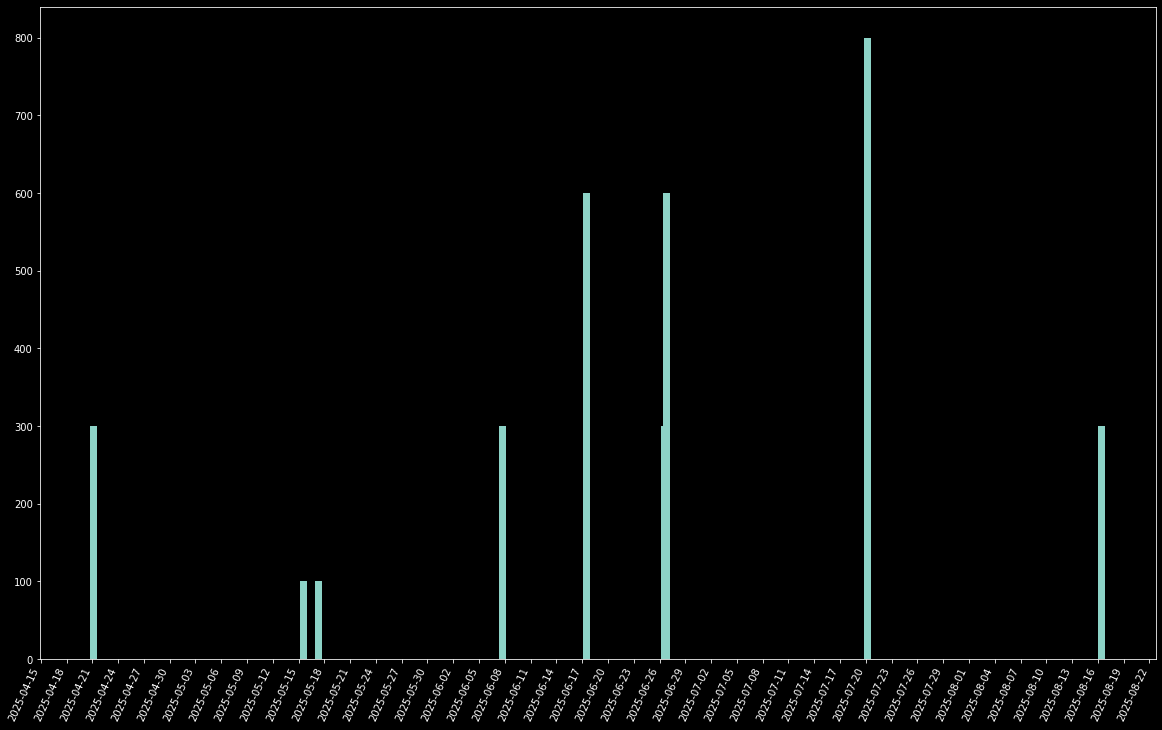

In [15]:
import matplotlib.dates as mdates

plt.style.use('dark_background')

x = operation_dates
y = [x[3] for x in procurement_operations]

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))
plt.bar(x,y)
#plt.gcf().autofmt_xdate()
plt.xticks(rotation=65, ha='right')
plt.gcf().set_size_inches(20,12)

In [64]:
from typing import List, Tuple, Dict

travel_edges: List[Tuple[int,int,int]] = [(row.Source, row.Target, row.Weight) for (_,row) in travel_channel.iterrows()]
travel_edges[0:5]    

[(78, 81, 2), (80, 70, 1), (80, 81, 3), (77, 70, 1), (79, 81, 1)]

In [97]:
import numpy

G: nx.DiGraph = nx.DiGraph(directed=True)
G.add_weighted_edges_from(travel_edges)

travel_matriz_adyacencia: numpy.matrix = nx.adjacency_matrix(G).todense()
travel_matriz_adjacencia_d: Dict[int, Dict[str, int]] = nx.convert.to_dict_of_dicts(G)
travel_matriz_adjacencia_d

{78: {81: {'weight': 2},
  70: {'weight': 4},
  69: {'weight': 1},
  76: {'weight': 4}},
 81: {},
 80: {70: {'weight': 1},
  81: {'weight': 3},
  76: {'weight': 3},
  69: {'weight': 5}},
 70: {},
 77: {70: {'weight': 1},
  81: {'weight': 2},
  76: {'weight': 1},
  69: {'weight': 4}},
 79: {81: {'weight': 1},
  70: {'weight': 3},
  69: {'weight': 3},
  76: {'weight': 2}},
 69: {},
 76: {},
 82: {69: {'weight': 5}},
 83: {69: {'weight': 1}},
 84: {69: {'weight': 1}},
 73: {70: {'weight': 3}, 76: {'weight': 4}, 71: {'weight': 2}},
 75: {70: {'weight': 5}, 76: {'weight': 4}, 71: {'weight': 1}},
 74: {70: {'weight': 1}, 76: {'weight': 1}, 71: {'weight': 2}},
 71: {},
 39: {70: {'weight': 3},
  69: {'weight': 2},
  71: {'weight': 1},
  72: {'weight': 3}},
 40: {70: {'weight': 3},
  69: {'weight': 1},
  71: {'weight': 6},
  72: {'weight': 3}},
 41: {70: {'weight': 3},
  69: {'weight': 3},
  71: {'weight': 4},
  72: {'weight': 6}},
 72: {},
 87: {71: {'weight': 2},
  81: {'weight': 2},
  72: {

In [103]:
destinos = set([item for sublist in [list(v.keys()) for v in travel_matriz_adjacencia_d.values()] for item in sublist])
destinos

{69, 70, 71, 72, 76, 81}

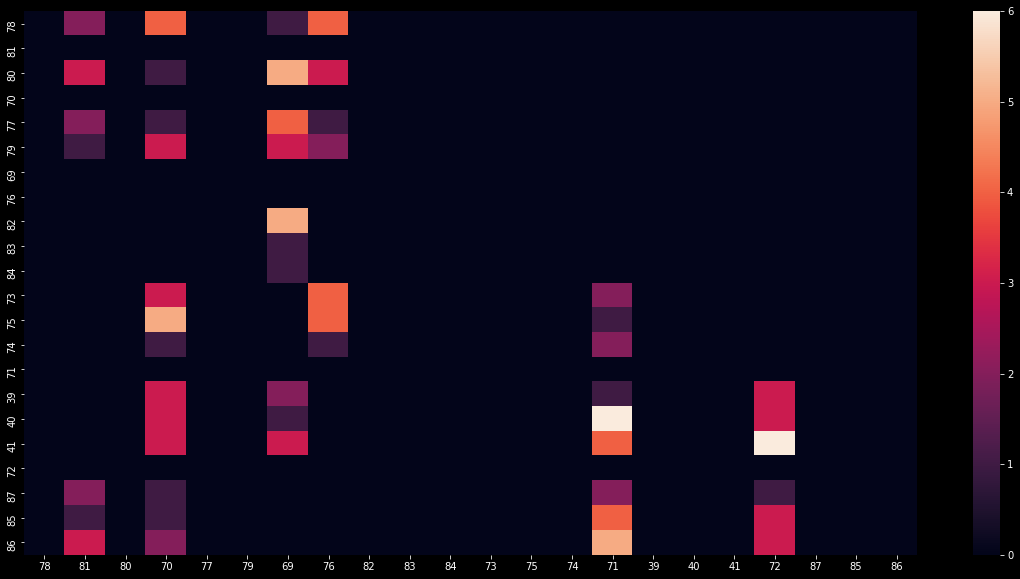

In [101]:
import seaborn as sns

plt.gcf().set_size_inches(20,10)

x_axis_labels: List[int] = travel_matriz_adjacencia_d.keys() 
y_axis_labels: List[int] = travel_matriz_adjacencia_d.keys()
    
sns.heatmap(travel_matriz_adyacencia, 
            xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels
            #,linewidth=0.1
           )

In [127]:
template_people =              set([0,2,27,29,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,73,74,75,77,78,79,80,82,83,84,85,86,87])
people_with_demographic_data = set([0,2,27,29,31,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,52,53,54,55,56,57,58,59,60,61,62,63,64,65])

travellers = set(travel_channel.Source.unique())
communicators = set(communication_channel.Source.unique()).union(set(communication_channel.Target.unique()))
travellers_and_communicators = travellers.intersection(communicators)
others = set([person for person in template_people if person not in communicators and person not in travellers])

travellers, communicators, travellers_and_communicators, others

({39, 40, 41, 73, 74, 75, 77, 78, 79, 80, 82, 83, 84, 85, 86, 87},
 {0, 27, 34, 37, 39, 40, 41, 43, 45, 47, 56, 57, 58, 63, 65, 66, 67},
 {39, 40, 41},
 {2,
  29,
  31,
  33,
  35,
  36,
  38,
  42,
  44,
  46,
  48,
  49,
  52,
  53,
  54,
  55,
  59,
  60,
  61,
  62,
  64})

In [129]:
cat_gasto = demographic_categories.values()

travellers_demographics    = demo_channel.loc[demo_channel.Source.isin(travellers)][['Source','Target','Weight','demo_category']]
communicators_demographics = demo_channel.loc[demo_channel.Source.isin(communicators)][['Source','Target','Weight','demo_category']]
others_demographics        = demo_channel.loc[demo_channel.Source.isin(others)][['Source','Target','Weight','demo_category']]

travellers_gastos    = travellers_demographics.groupby(['demo_category']).agg({'Weight' : 'sum'}).to_dict()['Weight']
communicators_gastos = communicators_demographics.groupby(['demo_category']).agg({'Weight' : 'sum'}).to_dict()['Weight']
others_gastos        = others_demographics.groupby(['demo_category']).agg({'Weight' : 'sum'}).to_dict()['Weight']

/opt/anaconda3/envs/py37/lib/python3.7/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


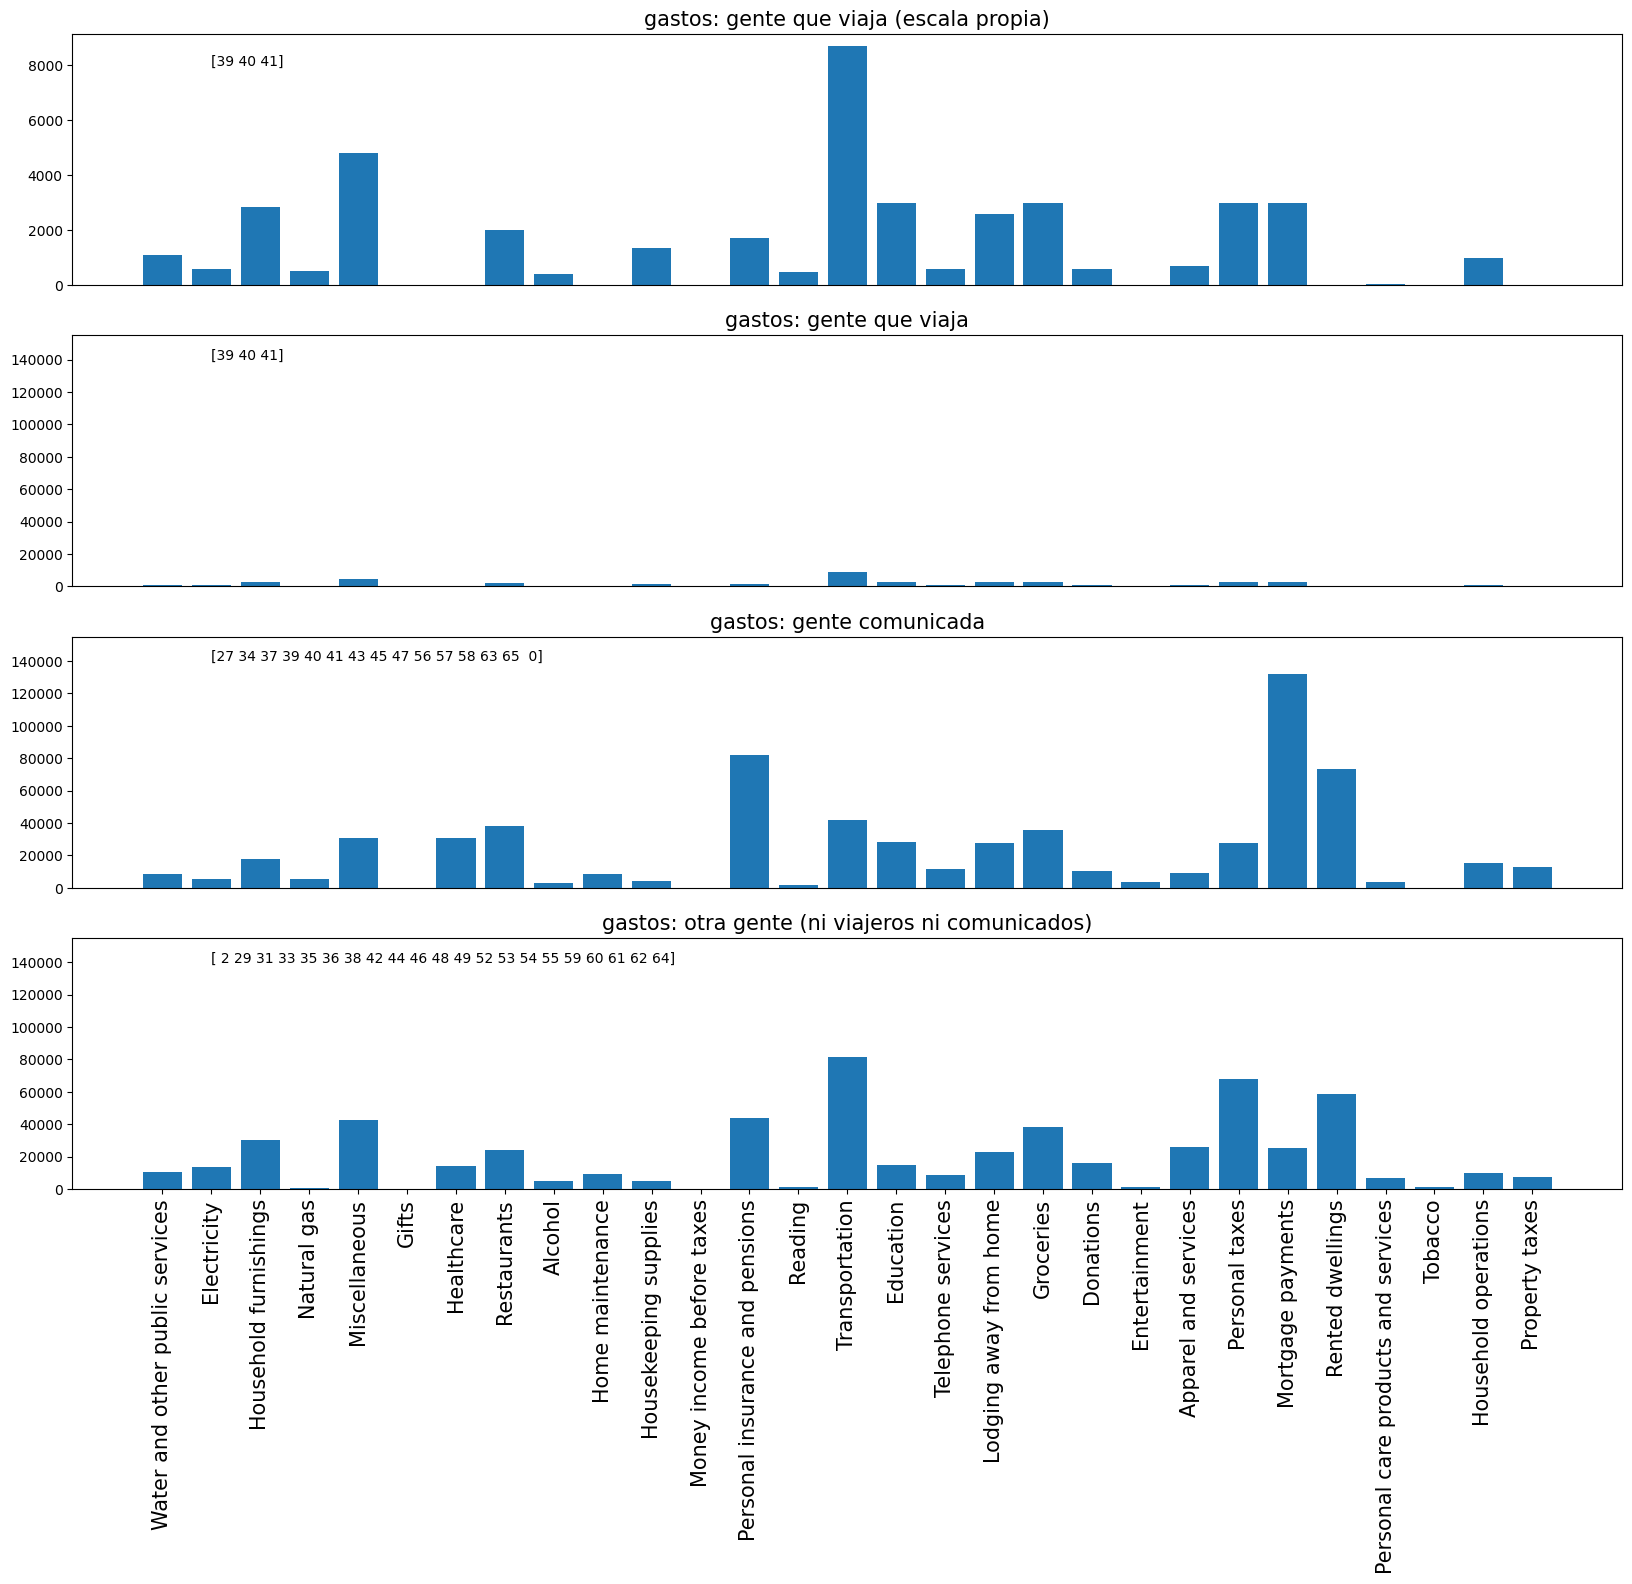

In [146]:
import matplotlib.gridspec as gridspec

plt.style.use('default') # dark_background')

gs = gridspec.GridSpec(4, 1)
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, :])
ax3 = fig.add_subplot(gs[2, :])
ax4 = fig.add_subplot(gs[3, :])
ax1.title.set_text('gastos: gente que viaja (escala propia)')
ax2.title.set_text('gastos: gente que viaja')
ax3.title.set_text('gastos: gente comunicada')
ax4.title.set_text('gastos: otra gente (ni viajeros ni comunicados)')
ax1.title.set_fontsize(15)
for ax in [ax2,ax3,ax4]:
    ax.title.set_fontsize(15)
    ax.set_ylim(top=155000)
    plt.sca(ax)
for ax in [ax1,ax2,ax3]:
    ax.xaxis.set_major_locator(plt.NullLocator())
plt.xticks(rotation=90, fontsize=15)

ax1.annotate(travellers_demographics.Source.unique(), xy=(1, 8000))
ax2.annotate(travellers_demographics.Source.unique(), xy=(1, 140000))
ax3.annotate(communicators_demographics.Source.unique(), xy=(1, 140000))
ax4.annotate(others_demographics.Source.unique(), xy=(1, 140000))

ax1.bar(range(0,len(cat_gasto)),[travellers_gastos.get(x,0) for x in cat_gasto])
ax2.bar(range(0,len(cat_gasto)),[travellers_gastos.get(x,0) for x in cat_gasto])
ax3.bar(range(0,len(cat_gasto)),[communicators_gastos.get(x,0) for x in cat_gasto])
ax4.bar(cat_gasto              ,[others_gastos.get(x,0) for x in cat_gasto])

plt.savefig("gastos.png")

In [148]:
travellers_gastos, communicators_gastos, others_gastos

({'Alcohol': 400,
  'Apparel and services': 700,
  'Donations': 600,
  'Education': 3000,
  'Electricity': 570,
  'Groceries': 3000,
  'Household furnishings': 2830,
  'Household operations': 970,
  'Housekeeping supplies': 1340,
  'Lodging away from home': 2600,
  'Miscellaneous': 4800,
  'Mortgage payments': 3000,
  'Natural gas': 500,
  'Personal care products and services': 40,
  'Personal insurance and pensions': 1700,
  'Personal taxes': 3000,
  'Reading': 490,
  'Restaurants': 2000,
  'Telephone services': 600,
  'Transportation': 8700,
  'Water and other public services': 1100},
 {'Alcohol': 3190,
  'Apparel and services': 8850,
  'Donations': 10400,
  'Education': 28100,
  'Electricity': 5490,
  'Entertainment': 3600,
  'Groceries': 35740,
  'Healthcare': 31000,
  'Home maintenance': 8752,
  'Household furnishings': 17930,
  'Household operations': 15070,
  'Housekeeping supplies': 4180,
  'Lodging away from home': 27700,
  'Miscellaneous': 31000,
  'Mortgage payments': 131730